Observable Trends -
1. BBC News have the most negative sentimental outcomes, and Fox News has the most positive outcomes.
2. CNN news outlet has the most neutral outcomes and it shows a wide range of sentimental analysis.
3. CBS has a highest positive reaction point as shown in the scatter plot.

**BBC, CBS, CNN, Fox, and New York times**

In [6]:
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
#BBC
bbc_target_user= "@BBCBreaking"

# Variables for holding sentiments
bbc_positive= []
bbc_negative = []
bbc_neutral = []
bbc_compound = []

bbc_account = []
bbc_tweet = []
bbc_tweet_dt = []
bbc_tweet_count = list(range(1, 101))

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(bbc_target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        bbc_account.append(tweet["user"]["name"])
        bbc_tweet.append(tweet["text"])
        bbc_tweet_dt.append(tweet["created_at"])
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
        
        # Add each value to the appropriate list
        bbc_positive.append(pos)
        bbc_negative.append(neg)
        bbc_neutral.append(neu)
        bbc_compound.append(compound)
        
bbc_df = pd.DataFrame(
    {'Source Account': bbc_account,
     'Tweet Text': bbc_tweet,
     'Tweet Date': bbc_tweet_dt,
     'Positive Score': bbc_positive,
     'Neutral Score': bbc_neutral,
     'Negative Score': bbc_negative,
     'Compound Score': bbc_compound,
    })

bbc_df = bbc_df[["Source Account", "Tweet Text", "Tweet Date", "Compound Score", "Positive Score", "Neutral Score", "Negative Score"]]

In [23]:
bbc_df.head()

,Source Account,Tweet Text,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,BBC Breaking News,Brett Kavanaugh's nomination to US Supreme Cou...,Fri Sep 28 18:04:12 +0000 2018,0.5719,0.227,0.773,0.000
1,BBC Breaking News,Facebook says the security flaw has been fixed...,Fri Sep 28 17:44:43 +0000 2018,0.3400,0.098,0.902,0.000
2,BBC Breaking News,"50 million Facebook accounts compromised, the ...",Fri Sep 28 17:08:56 +0000 2018,0.0000,0.000,1.000,0.000
3,BBC Breaking News,Officers searching for missing Worcester stude...,Fri Sep 28 15:55:27 +0000 2018,-0.2960,0.000,0.872,0.128
4,BBC Breaking News,Danish police seal off bridges and ferries to ...,Fri Sep 28 12:54:18 +0000 2018,0.0000,0.000,1.000,0.000


In [30]:
#CBS
cbs_target_user= "@CBS"

# Variables for holding sentiments
cbs_positive= []
cbs_negative = []
cbs_neutral = []
cbs_compound = []

cbs_account = []
cbs_tweet = []
cbs_tweet_dt = []
cbs_tweet_count = list(range(1, 101))

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cbs_target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        cbs_account.append(tweet["user"]["name"])
        cbs_tweet.append(tweet["text"])
        cbs_tweet_dt.append(tweet["created_at"])
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
        
        # Add each value to the appropriate list
        cbs_positive.append(pos)
        cbs_negative.append(neg)
        cbs_neutral.append(neu)
        cbs_compound.append(compound)
        
cbs_df = pd.DataFrame(
    {'Source Account': cbs_account,
     'Tweet Text': cbs_tweet,
     'Tweet Date': cbs_tweet_dt,
     'Positive Score': cbs_positive,
     'Neutral Score': cbs_neutral,
     'Negative Score': cbs_negative,
     'Compound Score': cbs_compound,
    })

cbs_df = cbs_df[["Source Account", "Tweet Text", "Tweet Date", "Compound Score", "Positive Score", "Neutral Score", "Negative Score"]]

In [31]:
cbs_df.head()

,Source Account,Tweet Text,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,CBS,".@happytogether's @wayansjr, @HereIsGina &amp;...",Fri Sep 28 20:16:14 +0000 2018,0.0,0.0,1.0,0.0
1,CBS,"If you haven't seen @SEALTeamCBS, make it your...",Fri Sep 28 17:52:41 +0000 2018,0.0,0.0,1.0,0.0
2,CBS,⚡️ “Murphy Brown Returns to CBS”\n\nhttps://t....,Fri Sep 28 16:51:50 +0000 2018,0.0,0.0,1.0,0.0
3,CBS,.@TheNeighborhood's @iamgreenfield revealing h...,Thu Sep 27 20:19:18 +0000 2018,0.0,0.0,1.0,0.0
4,CBS,RT @MurphyBrownCBS: A moment 20 years in the m...,Thu Sep 27 20:01:53 +0000 2018,0.0,0.0,1.0,0.0


In [24]:
#CNN
cnn_target_user= "@cnnbrk"

# Variables for holding sentiments
cnn_positive= []
cnn_negative = []
cnn_neutral = []
cnn_compound = []

cnn_account = []
cnn_tweet = []
cnn_tweet_dt = []
cnn_tweet_count = list(range(1, 101))

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cnn_target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        cnn_account.append(tweet["user"]["name"])
        cnn_tweet.append(tweet["text"])
        cnn_tweet_dt.append(tweet["created_at"])
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
        
        # Add each value to the appropriate list
        cnn_positive.append(pos)
        cnn_negative.append(neg)
        cnn_neutral.append(neu)
        cnn_compound.append(compound)
        
cnn_df = pd.DataFrame(
    {'Source Account': cnn_account,
     'Tweet Text': cnn_tweet,
     'Tweet Date': cnn_tweet_dt,
     'Positive Score': cnn_positive,
     'Neutral Score': cnn_neutral,
     'Negative Score': cnn_negative,
     'Compound Score': cnn_compound,
    })

cnn_df = cnn_df[["Source Account", "Tweet Text", "Tweet Date", "Compound Score", "Positive Score", "Neutral Score", "Negative Score"]]

In [25]:
cnn_df.head()

,Source Account,Tweet Text,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,CNN Breaking News,Senate GOP agrees to a week for an FBI investi...,Fri Sep 28 20:16:44 +0000 2018,0.6597,0.241,0.759,0.000
1,CNN Breaking News,Six Palestinians died after being shot by Isra...,Fri Sep 28 19:43:36 +0000 2018,-0.5574,0.000,0.833,0.167
2,CNN Breaking News,The House passes the final version of a legisl...,Fri Sep 28 19:29:46 +0000 2018,-0.3400,0.000,0.893,0.107
3,CNN Breaking News,Senate panel approves Brett Kavanaugh's Suprem...,Fri Sep 28 18:04:58 +0000 2018,0.4854,0.262,0.644,0.095
4,CNN Breaking News,Facebook says an attack discovered earlier thi...,Fri Sep 28 17:05:39 +0000 2018,-0.5267,0.000,0.761,0.239


In [33]:
#Fox News

fox_target_user= "@FoxNews"

# Variables for holding sentiments
fox_positive= []
fox_negative = []
fox_neutral = []
fox_compound = []

fox_account = []
fox_tweet = []
fox_tweet_dt = []
fox_tweet_count = list(range(1, 101))

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        fox_account.append(tweet["user"]["name"])
        fox_tweet.append(tweet["text"])
        fox_tweet_dt.append(tweet["created_at"])
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
        
        # Add each value to the appropriate list
        fox_positive.append(pos)
        fox_negative.append(neg)
        fox_neutral.append(neu)
        fox_compound.append(compound)
        
fox_df = pd.DataFrame(
    {'Source Account': fox_account,
     'Tweet Text': fox_tweet,
     'Tweet Date': fox_tweet_dt,
     'Positive Score': fox_positive,
     'Neutral Score': fox_neutral,
     'Negative Score': fox_negative,
     'Compound Score': fox_compound,
    })

fox_df = fox_df[["Source Account", "Tweet Text", "Tweet Date", "Compound Score", "Positive Score", "Neutral Score", "Negative Score"]]

In [34]:
fox_df.head()

,Source Account,Tweet Text,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,Fox News,Kavanaugh friend Mark Judge agrees to cooperat...,Fri Sep 28 21:30:29 +0000 2018,0.2960,0.266,0.585,0.149
1,Fox News,.@POTUS on Friday ordered the @FBI to conduct ...,Fri Sep 28 21:20:10 +0000 2018,0.0000,0.000,1.000,0.000
2,Fox News,BREAKING: @POTUS orders ‘supplemental’ @FBI in...,Fri Sep 28 21:08:09 +0000 2018,0.0000,0.000,1.000,0.000
3,Fox News,Senate Republicans ask for limited FBI investi...,Fri Sep 28 20:47:58 +0000 2018,-0.2263,0.000,0.863,0.137
4,Fox News,.@LindseyGrahamSC on if Senators are mad at @J...,Fri Sep 28 20:36:16 +0000 2018,-0.7506,0.000,0.670,0.330


In [35]:
#New York Times

nyt_target_user= "@nytimes"

# Variables for holding sentiments
nyt_positive= []
nyt_negative= []
nyt_neutral= []
nyt_compound= []

nyt_account= []
nyt_tweet= []
nyt_tweet_dt= []
nyt_tweet_count= list(range(1, 101))

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets =api.user_timeline(nyt_target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        nyt_account.append(tweet["user"]["name"])
        nyt_tweet.append(tweet["text"])
        nyt_tweet_dt.append(tweet["created_at"])
        
        compound= analyzer.polarity_scores(tweet["text"])["compound"]
        pos= analyzer.polarity_scores(tweet["text"])["pos"]
        neg= analyzer.polarity_scores(tweet["text"])["neg"]
        neu= analyzer.polarity_scores(tweet["text"])["neu"]
        
        
        # Add each value to the appropriate list
        nyt_positive.append(pos)
        nyt_negative.append(neg)
        nyt_neutral.append(neu)
        nyt_compound.append(compound)
        
nyt_df = pd.DataFrame(
    {'Source Account':nyt_account,
     'Tweet Text': nyt_tweet,
     'Tweet Date':nyt_tweet_dt,
     'Positive Score': nyt_positive,
     'Neutral Score': nyt_neutral,
     'Negative Score':nyt_negative,
     'Compound Score':nyt_compound,
    })

nyt_df =nyt_df[["Source Account", "Tweet Text", "Tweet Date", "Compound Score", "Positive Score", "Neutral Score", "Negative Score"]]

In [36]:
nyt_df.head()

,Source Account,Tweet Text,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,The New York Times,RT @dgelles: NEW: The story behind the lawsuit...,Sat Sep 29 03:02:02 +0000 2018,-0.6369,0.000,0.766,0.234
1,The New York Times,The Yankees have clinched home-field advantage...,Sat Sep 29 02:45:07 +0000 2018,0.2500,0.111,0.889,0.000
2,The New York Times,How the FBI will investigate the Kavanaugh acc...,Sat Sep 29 02:32:03 +0000 2018,-0.3182,0.000,0.777,0.223
3,The New York Times,RT @nytgraphics: The Senate testimony of Chris...,Sat Sep 29 02:17:02 +0000 2018,-0.5267,0.000,0.866,0.134
4,The New York Times,"In case you're listening to Robyn's new song, ...",Sat Sep 29 02:02:03 +0000 2018,0.0000,0.000,1.000,0.000


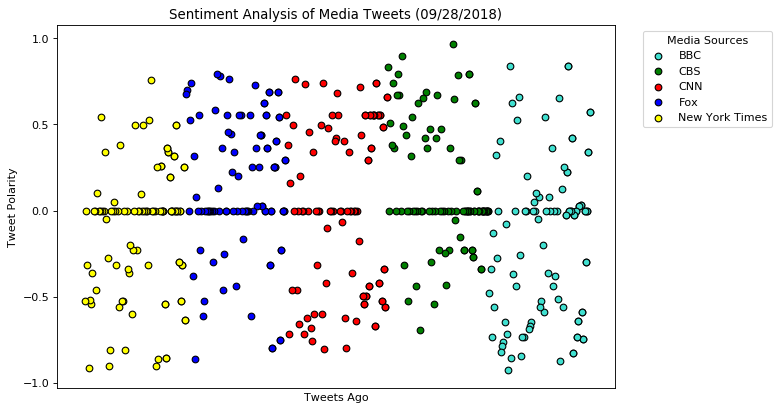

In [58]:
#Scatter Plot
plt.figure(num=None, figsize=(9, 6), dpi=80)

plt.scatter(bbc_tweet,bbc_compound, label="BBC", c="turquoise", edgecolors="black")
plt.scatter(cbs_tweet, cbs_compound,label="CBS", c="green", edgecolors="black")
plt.scatter(cnn_tweet,cnn_compound, label="CNN", c="red", edgecolors="black")
plt.scatter(fox_tweet,fox_compound,label="Fox", c="blue", edgecolors="black")
plt.scatter(nyt_tweet, nyt_compound,label="New York Times", c="yellow", edgecolors="black")

#defining the graph
plt.xticks([])
plt.title("Sentiment Analysis of Media Tweets (09/28/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.legend(title="Media Sources", bbox_to_anchor=(1.04,1), loc="upper left")
plt.gca().invert_xaxis()
plt.savefig("ScatterPlot.png")
plt.show()

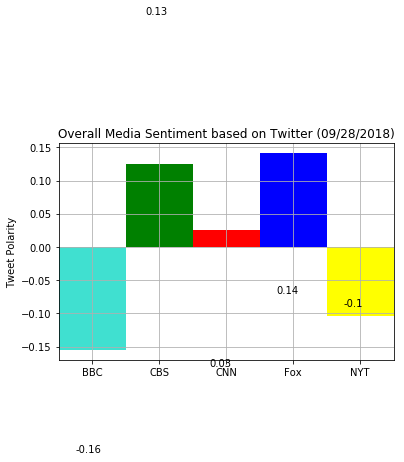

In [59]:
#Bar Chart

news_outlets = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_axis = np.arange(0, len(news_outlets))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 1)
fig, ax = plt.subplots()  

plt.title("Overall Media Sentiment based on Twitter (09/28/2018)")
plt.ylabel("Tweet Polarity")
plt.xlim(0.5,5.5)

plt.bar(1,np.mean(bbc_compound),width = 1, facecolor="turquoise")
plt.bar(2,np.mean(cbs_compound),width = 1, facecolor="green")
plt.bar(3,np.mean(cnn_compound),width = 1, facecolor="red")
plt.bar(4,np.mean(fox_compound),width = 1, facecolor="blue")
plt.bar(5,np.mean(nyt_compound),width = 1, facecolor="yellow")

plt.xticks(tick_locations, news_outlets)
ax.text(0.75,-0.31, str(round(np.mean(bbc_compound),2)))
ax.text(1.8,0.35, str(round(np.mean(cbs_compound),2)))
ax.text(2.75,-0.18, str(round(np.mean(cnn_compound),2)))
ax.text(3.75,-0.07, str(round(np.mean(fox_compound),2)))
ax.text(4.75,-0.09, str(round(np.mean(nyt_compound),2)))

plt.grid(b=None)
plt.savefig("BarChart.png")
plt.show()

In [60]:
total_data_df = bbc_df.append(cbs_df)
total_data_df = total_data_df.append(cnn_df)
total_data_df =total_data_df.append(fox_df)
total_data_df =total_data_df.append(nyt_df)
total_data_df.to_csv("News_Analysis_Data.csv")

/anaconda3/envs/Python_36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
